In [72]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# importing Iris dataset from my local drive.
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Preparing the Dataset

In [74]:
iris_df.drop(["Id","Species"], axis = 1, inplace=True)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
x = iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### How do you find the optimal numer of clusters for k-mean?

In [76]:
from sklearn.cluster import KMeans

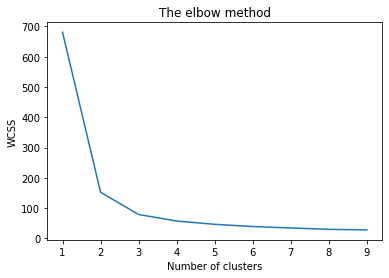

In [77]:
wcss = []
k_range = range(1,10)
for i in k_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 12, random_state = 2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'.
plt.plot(k_range, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squared errors
plt.show()

### From the above graph we can clearly see that the optimal value of cluster for k-means is '3' as it is the point where 'the elbow' occur.

### Modeling

In [78]:
#Apply the k-means to the dataset with value of cluster is equal to 3
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)

KMeans(n_clusters=3, n_init=12)

In [79]:
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [80]:
y_pred=pd.DataFrame(labels)
y_pred.head()

,0
0,1
1,1
2,1
3,1
4,1


In [81]:
y_pred.columns=['predict']
y_pred.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [82]:
y_pred['predict'].value_counts()

0    62
1    50
2    38
Name: predict, dtype: int64

In [83]:
iris_df['clusters'] = y_pred
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Visualization with optimun number of clusters.

In [84]:
df=iris_df.copy()

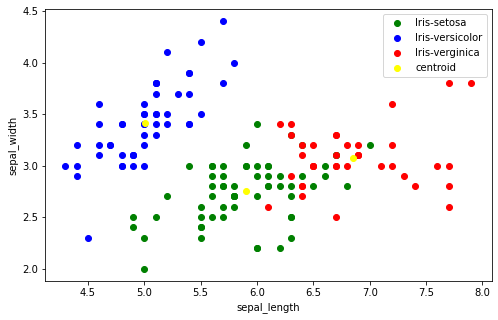

In [93]:
#visualising the clusters on the first two columns
plt.figure(figsize=(8,5))
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='green',label='Iris-setosa')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='blue',label='Iris-versicolor')
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'],color='red',label='Iris-verginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#plotting the centroid of the cluster
plt.scatter(k_means.cluster_centers_[:,[0]],k_means.cluster_centers_[:,[1]],color='yellow',label='centroid')
plt.legend()